In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

## data loading

In [111]:
train = pd.read_csv('Ex1-training.csv')
test = pd.read_csv('Ex1-test.csv')

In [112]:
train.head()

,y,x1,x2
0,1,0.505022,4.106225
1,1,0.965577,4.881722
2,1,1.132776,4.324086
3,1,0.454710,4.684511
4,1,0.157760,3.599274


## Initiating and training KNN with k=10
#### 10 Nearest Neighbors

In [113]:
m1 = KNeighborsClassifier(n_neighbors=10)

In [114]:
m1.fit(train[['x1','x2']], train['y']);

#### Probability of classes at new point

In [115]:
pred = pd.DataFrame([[3,3.5]],columns=['x1','x2'])
m1.predict_proba(pred)

array([[0.5, 0.5, 0. ]])

#### 5 Nearest Neighbors

In [116]:
m2 = KNeighborsClassifier(n_neighbors=5)
m2.fit(train[['x1','x2']], train['y']);

### Decision region Drawing

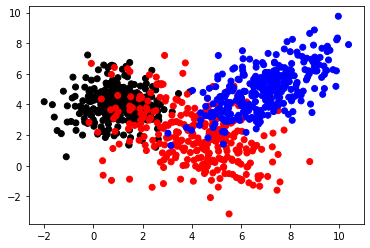

In [117]:
# plotting original data
plt.scatter(train['x1'],train['x2'],c=train['y'], cmap=ListedColormap(['black','red','blue']));

In [118]:
# Creating grid points
points = pd.DataFrame(columns=['x1','x2'])
for i in range(11):
    for j in range(11):
        points = pd.concat([points,pd.DataFrame([[i,j]],columns=['x1','x2'])])

In [119]:
# Using models to predict on gridded points
preds1 = m1.predict(points)
preds2 = m2.predict(points)

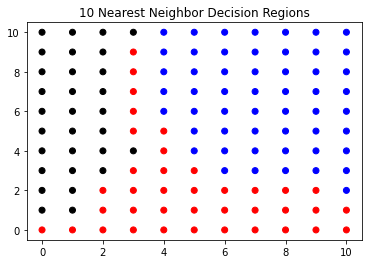

In [120]:
# Plotting decision regions
plt.scatter(points['x1'],points['x2'],c=preds1, cmap=ListedColormap(['black','red','blue']))
plt.title('10 Nearest Neighbor Decision Regions');

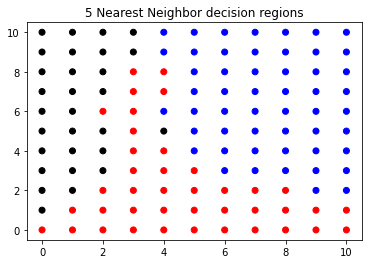

In [121]:
plt.scatter(points['x1'],points['x2'], c=preds2, cmap=ListedColormap(['black','red','blue']))
plt.title('5 Nearest Neighbor decision regions');

## Training and test error

In [122]:
errors = pd.DataFrame(columns=['k','flexibility','train_error','test_error'])
max_k = 25
for k in range(1,max_k+1):
    m = KNeighborsClassifier(n_neighbors=k)
    m.fit(train[['x1','x2']], train['y'])
    tr_err = 1 - m.score(train[['x1','x2']], train['y'])
    ts_err = 1 - m.score(test[['x1','x2']], test['y'])
    errors = pd.concat([errors,pd.DataFrame([[k,1/k,tr_err,ts_err]],columns=['k','flexibility','train_error','test_error'])])

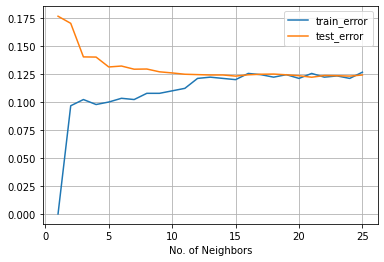

In [123]:
plt.plot(errors['k'],errors['train_error'])
plt.plot(errors['k'],errors['test_error'])
plt.legend(['train_error','test_error'])
plt.grid()
plt.xlabel('No. of Neighbors');

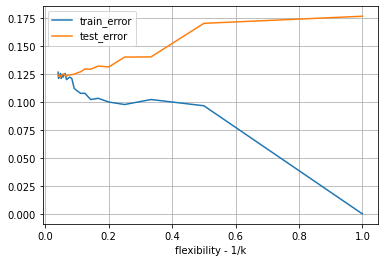

In [124]:
plt.plot(errors['flexibility'],errors['train_error'])
plt.plot(errors['flexibility'],errors['test_error'])
plt.legend(['train_error','test_error'])
plt.grid()
plt.xlabel('flexibility - 1/k');

## Multinomial Logistic regression

In [125]:
m3 = LogisticRegression(penalty='none',multi_class='multinomial').fit(train[['x1','x2']],train['y'])

In [126]:
preds3 = m3.predict(points)

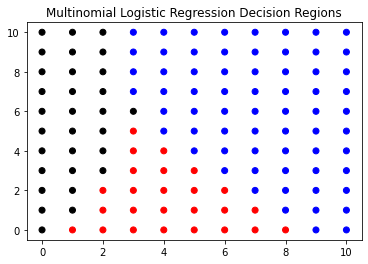

In [127]:
plt.scatter(points['x1'],points['x2'], c=preds3, cmap=ListedColormap(['black','red','blue']))
plt.title('Multinomial Logistic Regression Decision Regions');